# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mean_train = np.mean(X_train, axis=0)
X_train = X_train - mean_train
X_test = X_test - mean_train
print(X_train.size)


Loading MNIST dataset...


d:\Anaconda\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


43904000


## Part 2: Implement SVD for Dimensionality Reduction

In [22]:
def apply_svd_custom(X_train, X_test, n_components):
    AtA = np.dot(X_train.T, X_train)
    
    
    eigenvalues, V = np.linalg.eigh(AtA)  
    
   
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues_sorted = eigenvalues[sorted_indices]
    V_sorted = V[:, sorted_indices]
    
    
    squared_eigenvalues = eigenvalues_sorted  
    total_variance = np.sum(squared_eigenvalues)
    explained_variance = np.cumsum(squared_eigenvalues) / total_variance
    
    
    if n_components is None:
        k = np.searchsorted(explained_variance, variance_threshold) + 1
    else:
        k = n_components
    k = min(k, X_train.shape[1]) 
    
  
    V_k = V_sorted[:, :k]  
    

    train_reduced = np.dot(X_train, V_k)  
    test_reduced = np.dot(X_test, V_k)    
    
    return train_reduced, test_reduced, V_k, k
apply_svd_custom(X_train, X_test, 5)

(array([[-0.49203238, -2.15353895, -0.72244467, -0.29196423,  0.79828745],
        [ 0.7525049 ,  2.59776603,  2.48252046,  1.32080405,  0.51998636],
        [ 0.79602779,  0.72151286, -2.37459272, -0.48302521, -0.84829364],
        ...,
        [ 3.83443347, -1.45287698,  0.07739548, -0.06426232,  1.93008951],
        [-4.80284806, -1.56210442,  3.05639264, -1.22157805,  1.97911005],
        [-3.12588484, -4.13093294,  3.22660913, -0.66987663,  0.73538094]]),
 array([[-2.82312053, -1.57931137, -1.24640356, -1.75760909, -3.41548725],
        [ 0.95368192,  2.59541766, -1.3768525 , -0.6338088 , -1.42846462],
        [ 0.26074974, -0.39738213, -2.05808728,  0.49818689, -0.0225869 ],
        ...,
        [ 1.44597626, -3.35529157, -0.75757171,  0.99010175, -0.67093017],
        [ 0.84592396,  3.86615849, -1.50598569, -1.9175963 ,  0.22525269],
        [ 3.88516918, -2.15072985,  0.58276416,  0.44439472,  1.08620612]]),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0

## Part 3: Train Logistic Regression and Measure Performance

In [18]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [35]:
svd_components = [5, 10, 20,40,80,160]  # You need to decide what number to search...

# Store the results
acc = []
times = []
# Train the logistic regression model and get accuracy and training time
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, V_k, k = apply_svd_custom(X_train, X_test, n_components)
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")
    acc.append(accuracy)
    times.append(training_time)


Applying custom SVD with 5 components...
SVD components: 5, Accuracy: 0.6796, Training time: 0.4427 seconds
Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.8035, Training time: 0.7557 seconds
Applying custom SVD with 20 components...
SVD components: 20, Accuracy: 0.8784, Training time: 1.9642 seconds
Applying custom SVD with 40 components...
SVD components: 40, Accuracy: 0.9022, Training time: 6.2759 seconds
Applying custom SVD with 80 components...
SVD components: 80, Accuracy: 0.9164, Training time: 21.4213 seconds
Applying custom SVD with 160 components...
SVD components: 160, Accuracy: 0.9194, Training time: 54.5521 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


[0.6796428571428571, 0.8035, 0.8784285714285714, 0.9022142857142857, 0.9163571428571429, 0.9194285714285715]


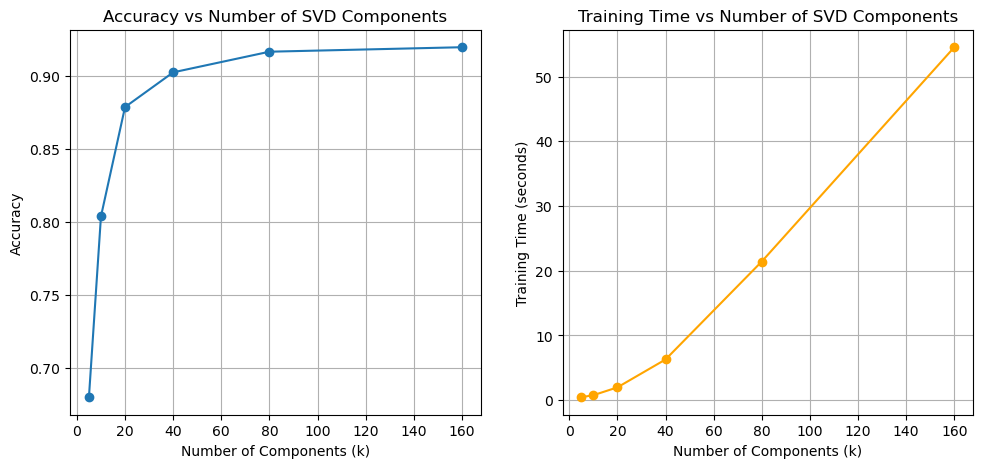

In [36]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
def plot_picture( V_k):
    num_vectors = min(5, V_k.shape[1])
    for i in range(num_vectors):
        singular_vector = V_k[:, i]
        singular_image = singular_vector.reshape(28, 28)
        plt.subplot(1, num_vectors, i+1)
        plt.imshow(singular_image, cmap='gray')
        plt.title(f'Singular Vector {i+1}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
def plot_results(accuracies, training_times, k_values, V_k):
    plt.figure(figsize=(18, 5))
    plt.subplot(1, 3, 1)
    plt.plot(k_values, accuracies, marker='o')
    plt.title('Accuracy vs Number of SVD Components')
    plt.xlabel('Number of Components (k)')
    plt.ylabel('Accuracy')
    plt.grid(True)

    plt.subplot(1, 3, 2)
    plt.plot(k_values, training_times, marker='o', color='orange')
    plt.title('Training Time vs Number of SVD Components')
    plt.xlabel('Number of Components (k)')
    plt.ylabel('Training Time (seconds)')
    plt.grid(True)
print(acc)
plot_results(acc,times,svd_components,V_k)

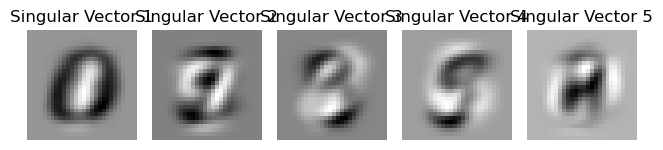

In [37]:
plot_picture(V_k)

## Part 6: Analyze / Conclusion 

YOUR ANSWER:
1. From the graph 'Accuracy vs Number of SVD Components' we can see that as the k increases, the accuracy will keep increasing until converage.
2. From the graph 'Training Time vs Number of SVD Components' we can see time cost is linearly related to k. 
3. For this task the best value of k may be 80